# Clustering Patterns

Essential Libraries
Let us begin by importing the essential Python Libraries.

NumPy : Library for Numeric Computations in Python <br>
Pandas : Library for Data Acquisition and Preparation <br>
Matplotlib : Low-level library for Data Visualization <br>
Seaborn : Higher-level library for Data Visualization

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

### Import the Dataset

The dataset is in CSV format; hence we use the read_csv function from Pandas.
Immediately after importing, take a quick look at the data using the head function.

In [2]:
schdata = pd.read_csv('../../datasets/dataset.csv')
schdata.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


Check the vital statistics of the dataset using the type and shape attributes.

In [3]:
print("Data type : ", type(schdata))
print("Data dims : ", schdata.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (4424, 35)


Check the variables (and their types) in the dataset using the dtypes attribute.

In [4]:
print(schdata.dtypes)

Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance                          int64
Previous qualification                              int64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees up to date                             int64
Gender                                              int64
Scholarship holder                                  int64
Age at enrollm

### Bi-Variate KMeans Clustering

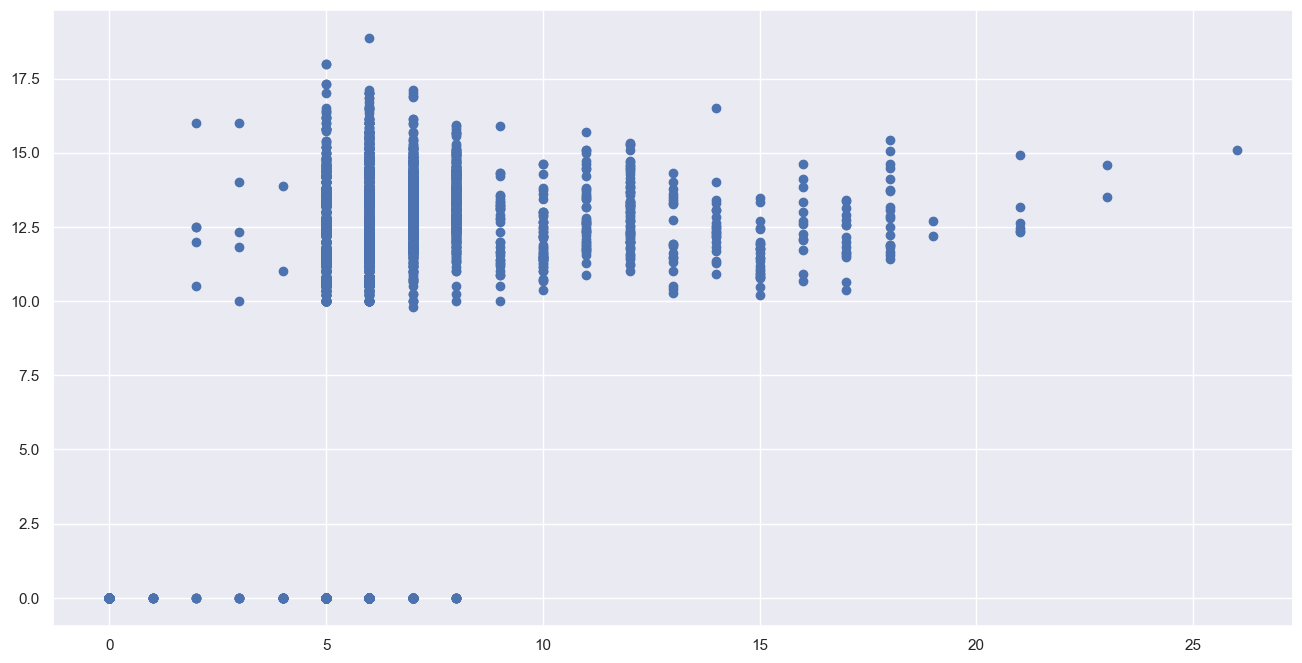

In [5]:
# Extract the Features from the Data
X = pd.DataFrame(schdata[["Curricular units 1st sem (enrolled)", "Curricular units 1st sem (grade)"]])

# Plot the Raw Data on a 2D grid
f = plt.figure(figsize=(16,8))
plt.scatter(x = "Curricular units 1st sem (enrolled)", y = "Curricular units 1st sem (grade)", data = X)

### Basic KMeans Clustering

Guess the number of clusters from the 2D plot, and perform KMeans Clustering.
We will use the KMeans clustering model from sklearn.cluster module.

In [6]:
# Import KMeans from sklearn.cluster
from sklearn.cluster import KMeans

# Guess the Number of Clusters
num_clust = 3

# Create Clustering Model using KMeans
kmeans = KMeans(n_clusters = num_clust)

# Fit the Clustering Model on the Data
kmeans.fit(X)

KMeans(n_clusters=3)

Print the Cluster Centers as Co-ordinates of Features

In [7]:
# Print the Cluster Centers
print("Features", "\tCurricular units 1st sem (enrolled)", "\tCurricular units 1st sem (grade)")
print()

for i, center in enumerate(kmeans.cluster_centers_):
    print("Cluster", i, end=":\t")
    for coord in center:
        print(round(coord, 2), end="\t")
    print()

Features 	Curricular units 1st sem (enrolled) 	Curricular units 1st sem (grade)

Cluster 0:	6.13	12.71	
Cluster 1:	4.16	0.0	
Cluster 2:	13.18	12.59	


### Labeling the Clusters in the Data

We may use the model on the data to predict the clusters.

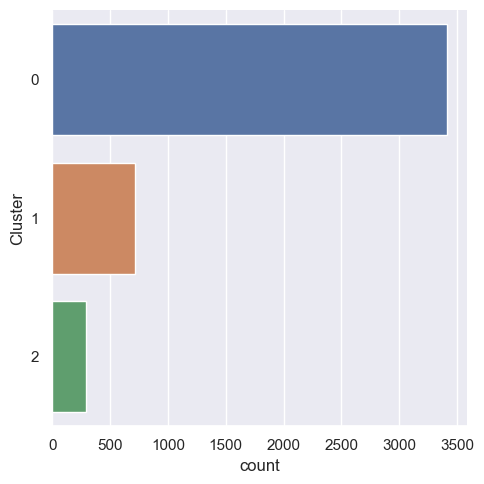

In [8]:
# Predict the Cluster Labels
labels = kmeans.predict(X)

# Append Labels to the Data
X_labeled = X.copy()
X_labeled["Cluster"] = pd.Categorical(labels)

# Summary of the Cluster Labels
sb.catplot(y = "Cluster", data = X_labeled, kind = "count")

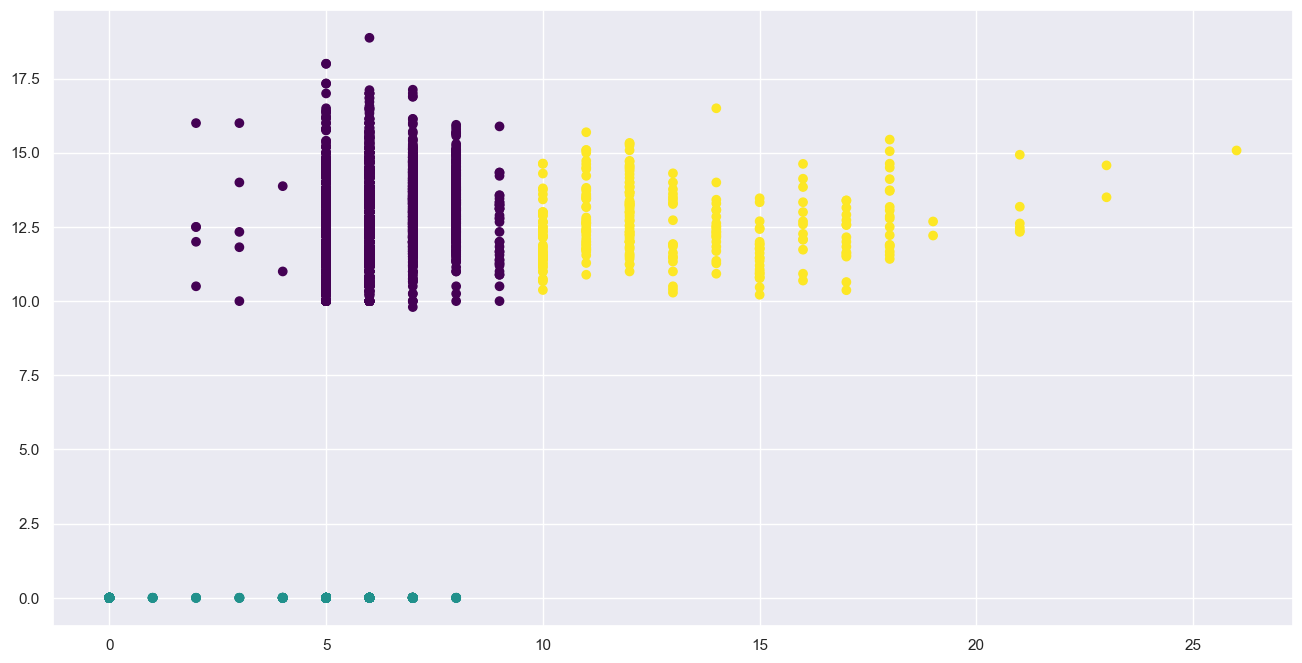

In [9]:
# Visualize the Clusters in the Data
f = plt.figure(figsize=(16,8))
plt.scatter(x = "Curricular units 1st sem (enrolled)", y = "Curricular units 1st sem (grade)", c = "Cluster", cmap = 'viridis', data = X_labeled)

### Within Cluster Sum of Squares

WithinSS = 0 : Every data point is a cluster on its own <br>
WithinSS = Variance : Whole dataset is a single cluster

In [10]:
# Print the Within Cluster Sum of Squares
print("Within Cluster Sum of Squares :", kmeans.inertia_)

Within Cluster Sum of Squares : 16879.802118319436


Vary the Number of Clusters to obtain a distribution of WithinSS.

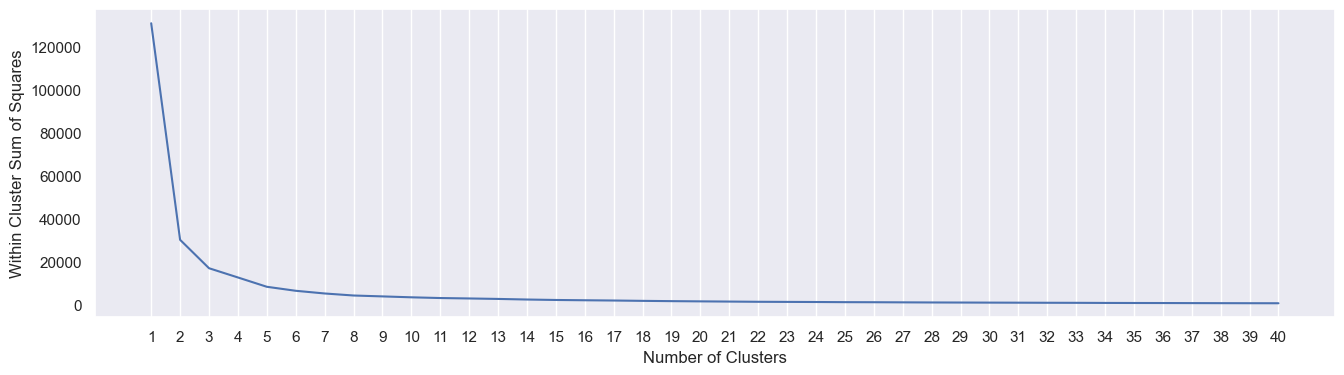

In [11]:
# Import KMeans from sklearn.cluster
from sklearn.cluster import KMeans

# Extract the Features from the Data
X = pd.DataFrame(schdata[["Curricular units 1st sem (enrolled)", "Curricular units 1st sem (grade)"]])

# Vary the Number of Clusters
min_clust = 1
max_clust = 40

# Compute Within Cluster Sum of Squares
within_ss = []
for num_clust in range(min_clust, max_clust+1):
    kmeans = KMeans(n_clusters = num_clust)
    kmeans.fit(X)
    within_ss.append(kmeans.inertia_)

# Plot Within SS vs Number of Clusters
f = plt.figure(figsize=(16,4))
plt.plot(range(min_clust, max_clust+1), within_ss)
plt.xlabel('Number of Clusters')
plt.ylabel('Within Cluster Sum of Squares')
plt.xticks(np.arange(min_clust, max_clust+1, 1.0))
plt.grid(which='major', axis='y')
plt.show()

### Optimal Clustering

Choose the "optimal" number of clusters from the plot.

Cluster 0:	6.13	12.71	
Cluster 1:	13.18	12.59	
Cluster 2:	5.64	0.0	
Cluster 3:	0.08	0.0	

Within Cluster Sum of Squares : 12541.583271242242



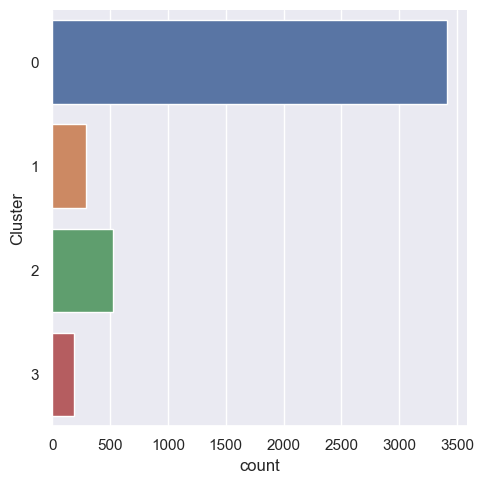

In [12]:
# Set "optimal" Number of Clusters
num_clust = 4

# Create Clustering Model using KMeans
kmeans = KMeans(n_clusters = num_clust)                 

# Fit the Clustering Model on the Data
kmeans.fit(X)

# Print the Cluster Centers
for i, center in enumerate(kmeans.cluster_centers_):
    print("Cluster", i, end=":\t")
    for coord in center:
        print(round(coord, 2), end="\t")
    print()
print()

# Print the Within Cluster Sum of Squares
print("Within Cluster Sum of Squares :", kmeans.inertia_)
print()

# Predict the Cluster Labels
labels = kmeans.predict(X)

# Append Labels to the Data
X_labeled = X.copy()
X_labeled["Cluster"] = pd.Categorical(labels)

# Summary of the Cluster Labels
sb.catplot(y = "Cluster", data = X_labeled, kind = "count")

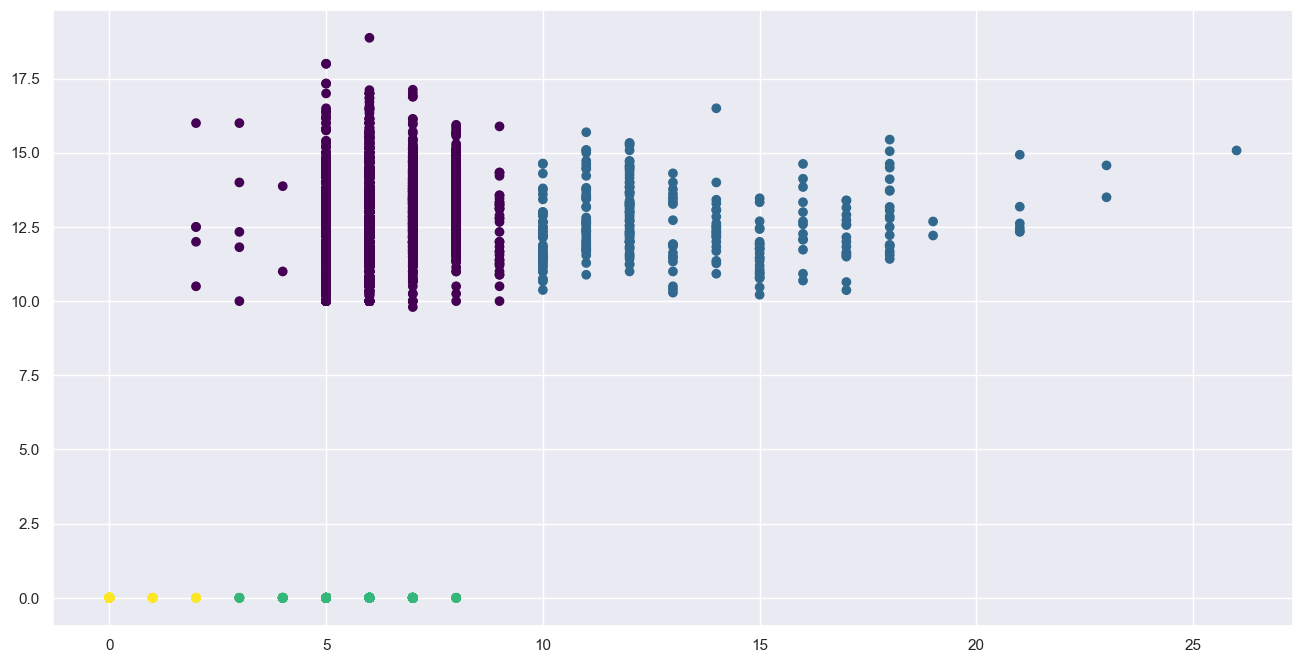

In [13]:
# Visualize the Clusters in the Data
f = plt.figure(figsize=(16,8))
plt.scatter(x = "Curricular units 1st sem (enrolled)", y = "Curricular units 1st sem (grade)", c = "Cluster", cmap = 'viridis', data = X_labeled)

### Interpret the Clusters

Try to interpret the clusters by exploring the Features across them.

<AxesSubplot: xlabel='Curricular units 1st sem (grade)', ylabel='Cluster'>

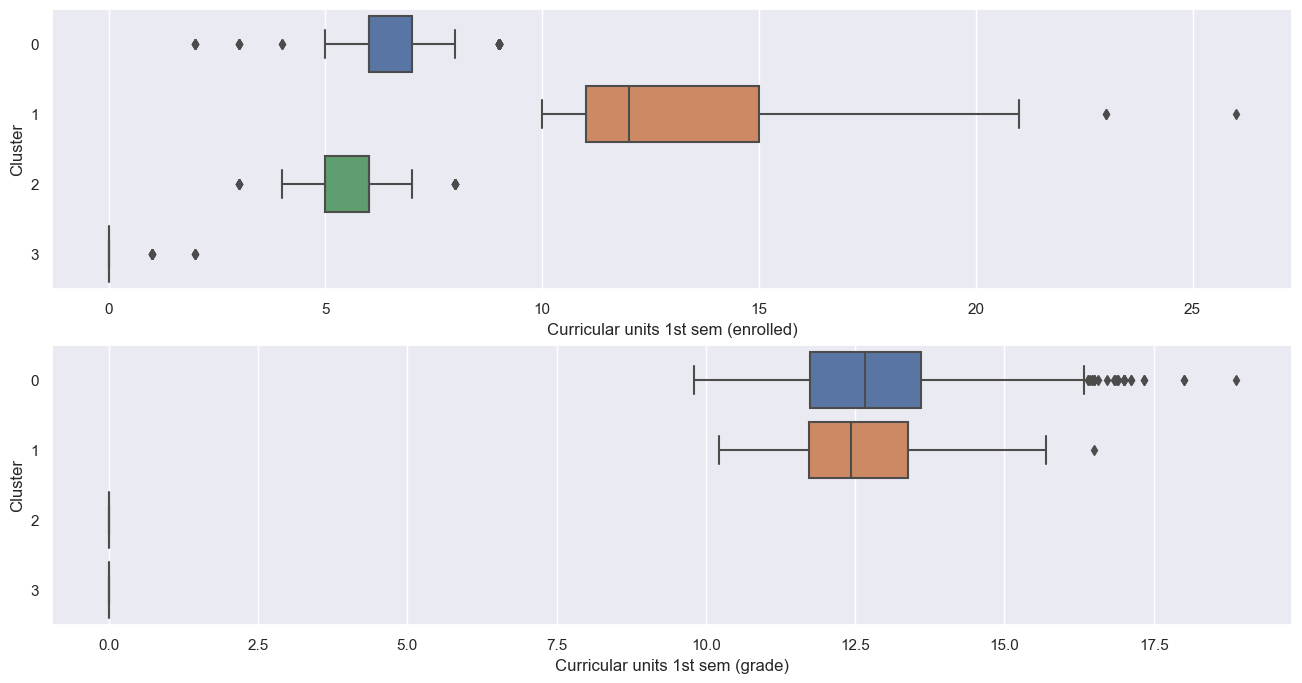

In [14]:
# Boxplots for the Features against the Clusters
f, axes = plt.subplots(2, 1, figsize=(16,8))
sb.boxplot(x = 'Curricular units 1st sem (enrolled)', y = 'Cluster', data = X_labeled, ax = axes[0])
sb.boxplot(x = 'Curricular units 1st sem (grade)', y = 'Cluster', data = X_labeled, ax = axes[1])

<AxesSubplot: xlabel='Cluster'>

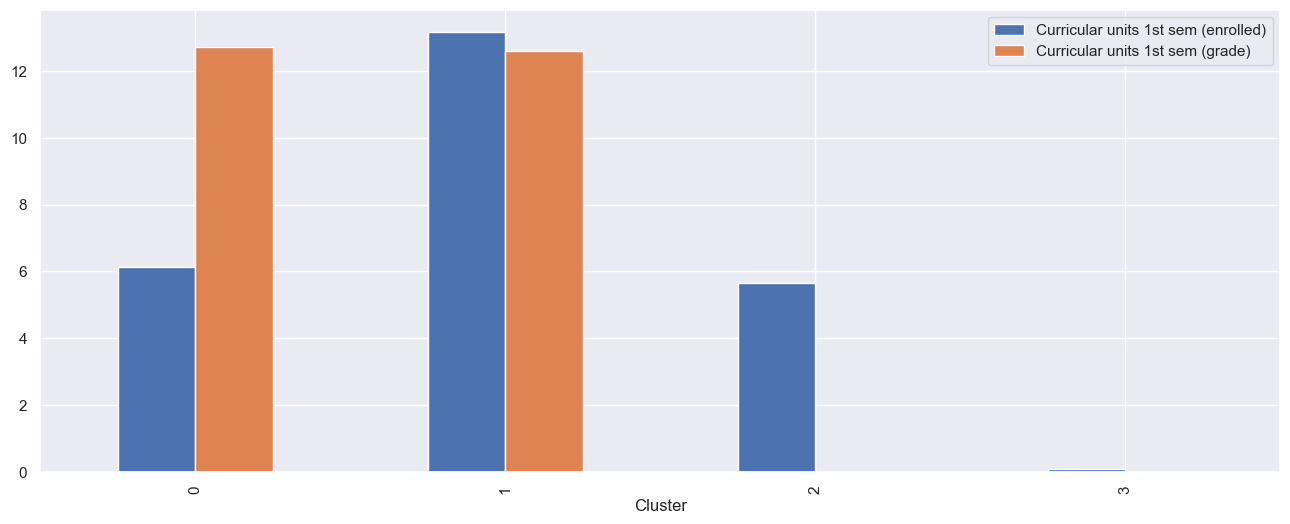

In [15]:
# Average Behaviour of each Cluster
cluster_data = pd.DataFrame(X_labeled.groupby(by = "Cluster").mean())
cluster_data.plot.bar(figsize = (16,6))

### KMeans++ Clustering (Bi-Variate)

Set up a Bi-Variate Clustering problem on the Dataset. <br>
Features to be used for Clustering : Curricular units 1st sem (enrolled), Curricular units 1st sem (grade) <br><br>

In this case, we will use the optimized KMeans++ algorithm.

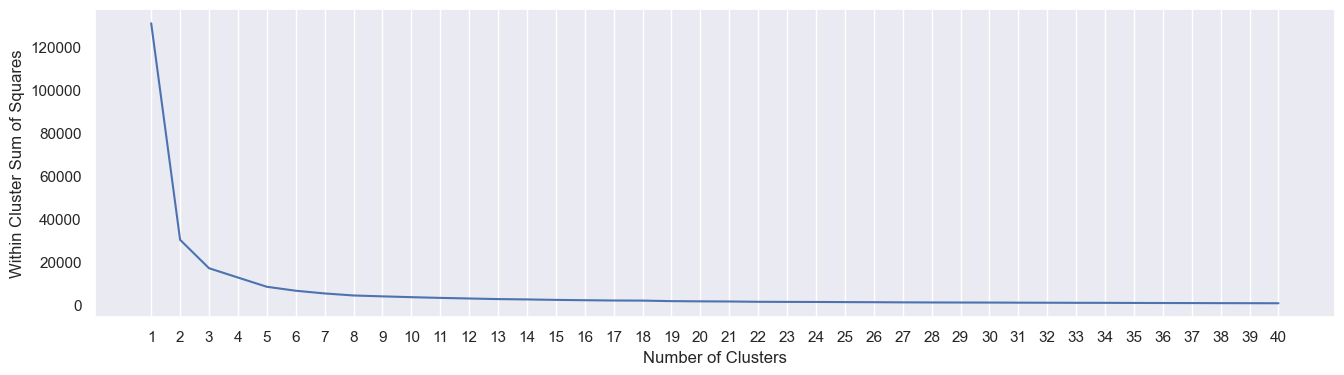

In [16]:
# Import KMeans from sklearn.cluster
from sklearn.cluster import KMeans

# Extract the Features from the Data
X = pd.DataFrame(schdata[["Curricular units 1st sem (enrolled)", "Curricular units 1st sem (grade)"]])

# Set the Initialization to KMeans++
init_algo = 'k-means++'

# Vary the Number of Clusters
min_clust = 1
max_clust = 40

# Compute Within Cluster Sum of Squares
within_ss = []
for num_clust in range(min_clust, max_clust+1):
    kmeans = KMeans(n_clusters = num_clust,        # number of clusters
                    init = init_algo,              # initialization algorithm
                    n_init = 5)                    # number of initializations
    kmeans.fit(X)
    within_ss.append(kmeans.inertia_)

# Plot Within SS vs Number of Clusters
f = plt.figure(figsize=(16,4))
plt.plot(range(min_clust, max_clust+1), within_ss)
plt.xlabel('Number of Clusters')
plt.ylabel('Within Cluster Sum of Squares')
plt.xticks(np.arange(min_clust, max_clust+1, 1.0))
plt.grid(which='major', axis='y')
plt.show()

### Optimal Clustering

Choose the "optimal" number of clusters from the plot.

Features 	Curricular units 1st sem (enrolled) 	Curricular units 1st sem (grade)

Cluster 0:	6.13	12.71	
Cluster 1:	5.64	0.0	
Cluster 2:	13.18	12.59	
Cluster 3:	0.08	0.0	

Within Cluster Sum of Squares : 12541.583271242242



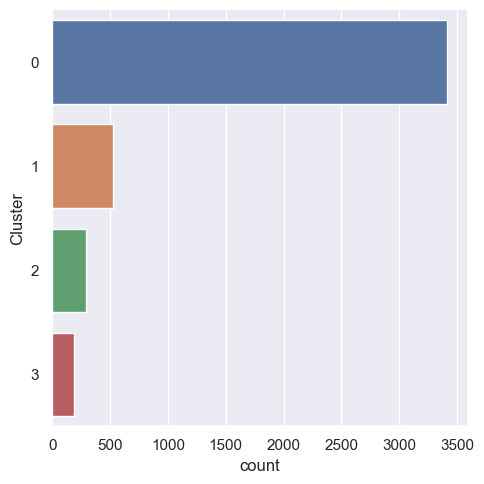

In [17]:
# Set "optimal" Number of Clusters
num_clust = 4

# Set the Initialization to KMeans++
init_algo = 'k-means++'

# Create Clustering Model using KMeans
kmeans = KMeans(n_clusters = num_clust, init = init_algo, n_init = 20)                 

# Fit the Clustering Model on the Data
kmeans.fit(X)

# Print the Cluster Centers
print("Features", "\tCurricular units 1st sem (enrolled)", "\tCurricular units 1st sem (grade)")
print()

for i, center in enumerate(kmeans.cluster_centers_):
    print("Cluster", i, end=":\t")
    for coord in center:
        print(round(coord, 2), end="\t")
    print()
print()

# Print the Within Cluster Sum of Squares
print("Within Cluster Sum of Squares :", kmeans.inertia_)
print()

# Predict the Cluster Labels
labels = kmeans.predict(X)

# Append Labels to the Data
X_labeled = X.copy()
X_labeled["Cluster"] = pd.Categorical(labels)

# Summary of the Cluster Labels
sb.catplot(y = "Cluster", data = X_labeled, kind = "count")

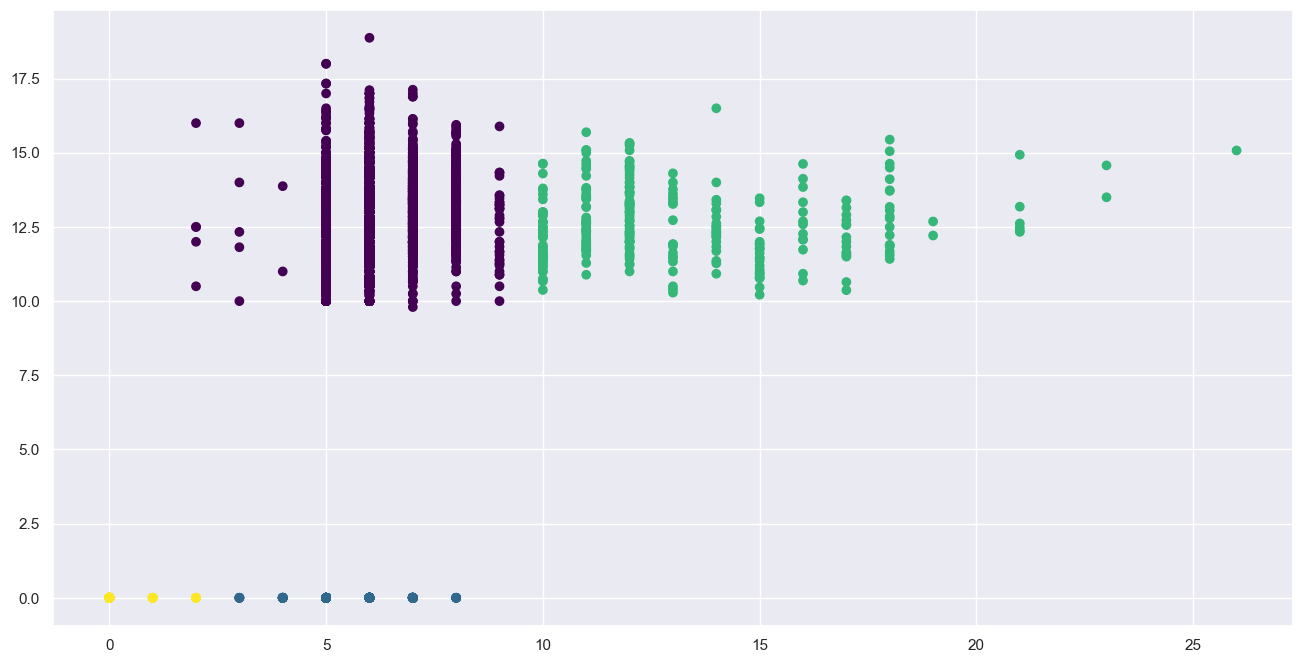

In [18]:
# Visualize the Clusters in the Data
f = plt.figure(figsize=(16,8))
plt.scatter(x = "Curricular units 1st sem (enrolled)", y = "Curricular units 1st sem (grade)", c = "Cluster", cmap = 'viridis', data = X_labeled)

### Interpret the Clusters

Try to interpret the clusters by exploring the Features across them.

<AxesSubplot: xlabel='Curricular units 1st sem (grade)', ylabel='Cluster'>

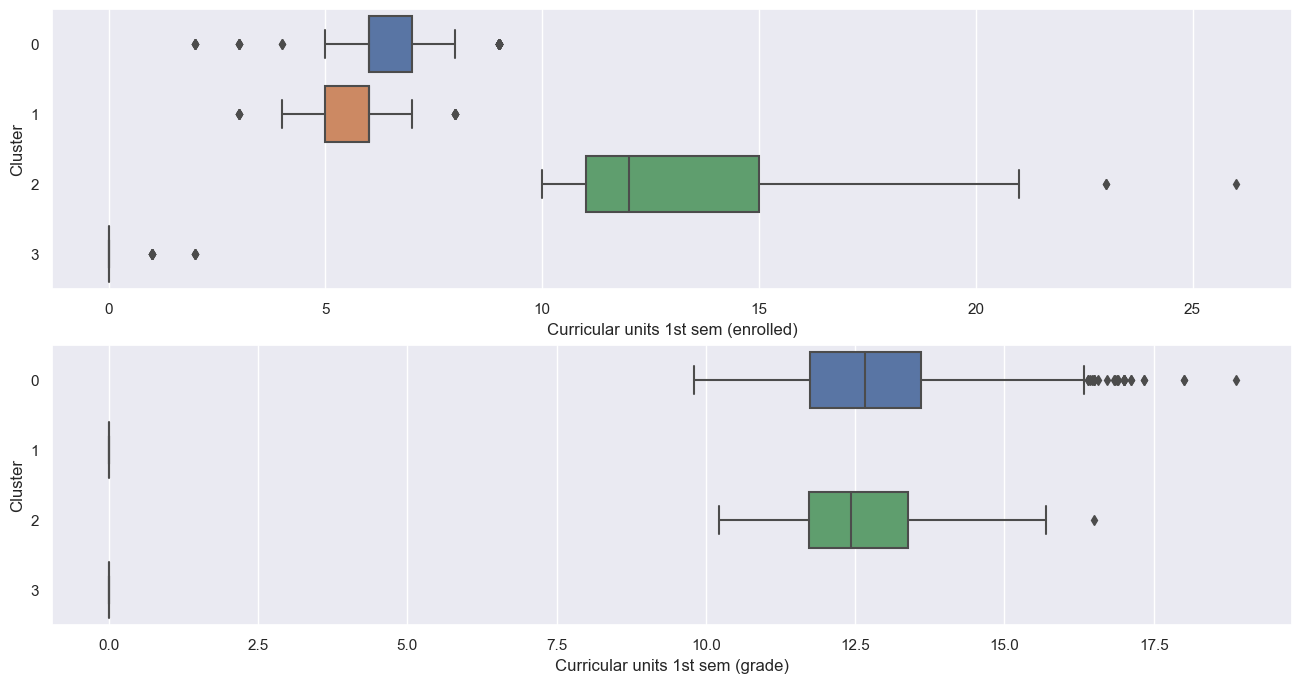

In [19]:
# Boxplots for the Features against the Clusters
f, axes = plt.subplots(2, 1, figsize=(16,8))
sb.boxplot(x = 'Curricular units 1st sem (enrolled)', y = 'Cluster', data = X_labeled, ax = axes[0])
sb.boxplot(x = 'Curricular units 1st sem (grade)', y = 'Cluster', data = X_labeled, ax = axes[1])

### Multi-Variate Clustering

Set up a Multi-Variate Clustering problem on the Pokemon Dataset. <br>
Features : Curricular units 1st sem (enrolled), Curricular units 1st sem (grade), Curricular units 2nd sem (enrolled), Curricular units 2nd sem (grade), Scholarship holder <br>

In this case, we will use the optimized KMeans++ algorithm.

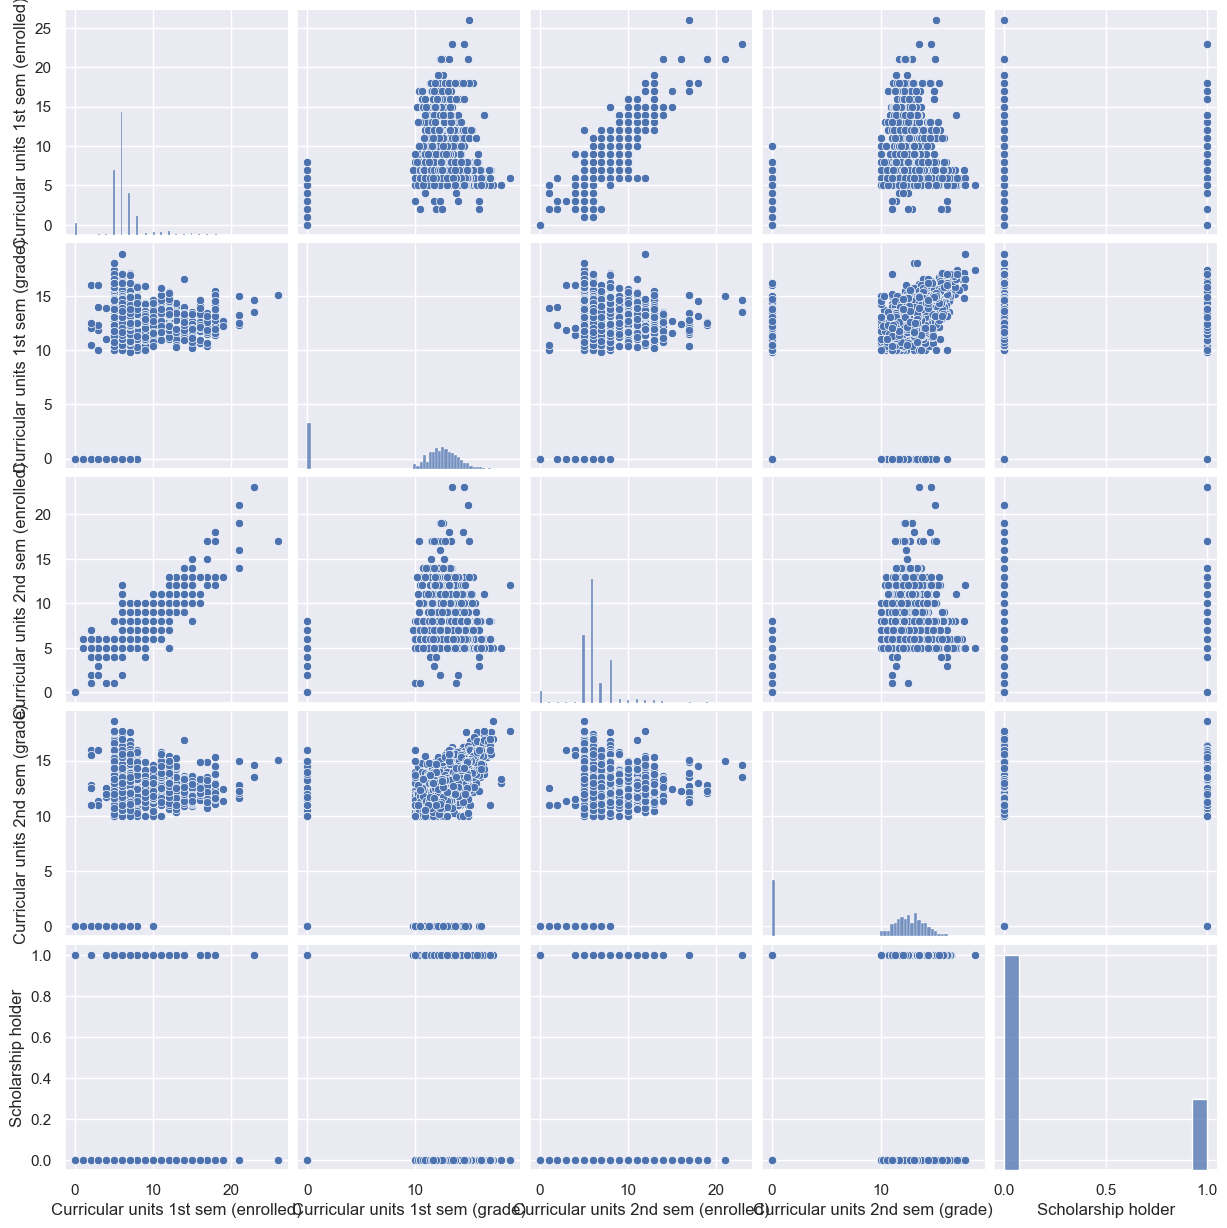

In [20]:
# Extract the Features from the Data
X = pd.DataFrame(schdata[["Curricular units 1st sem (enrolled)", "Curricular units 1st sem (grade)", "Curricular units 2nd sem (enrolled)", "Curricular units 2nd sem (grade)", "Scholarship holder"]]) 

# Plot the Raw Data on 2D grids
sb.pairplot(X)

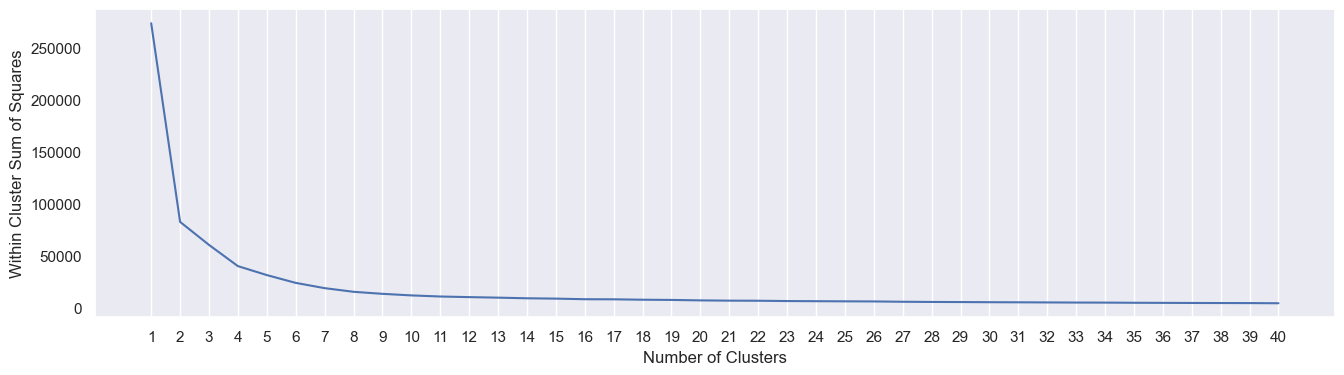

In [21]:
# Vary the Number of Clusters
min_clust = 1
max_clust = 40
init_algo = 'k-means++'

# Compute Within Cluster Sum of Squares
within_ss = []
for num_clust in range(min_clust, max_clust+1):
    kmeans = KMeans(n_clusters = num_clust, init = init_algo, n_init = 5)
    kmeans.fit(X)
    within_ss.append(kmeans.inertia_)

# Angle Plot : Within SS vs Number of Clusters
f = plt.figure(figsize=(16,4))
plt.plot(range(min_clust, max_clust+1), within_ss)
plt.xlabel('Number of Clusters')
plt.ylabel('Within Cluster Sum of Squares')
plt.xticks(np.arange(min_clust, max_clust+1, 1.0))
plt.grid(which='major', axis='y')
plt.show()

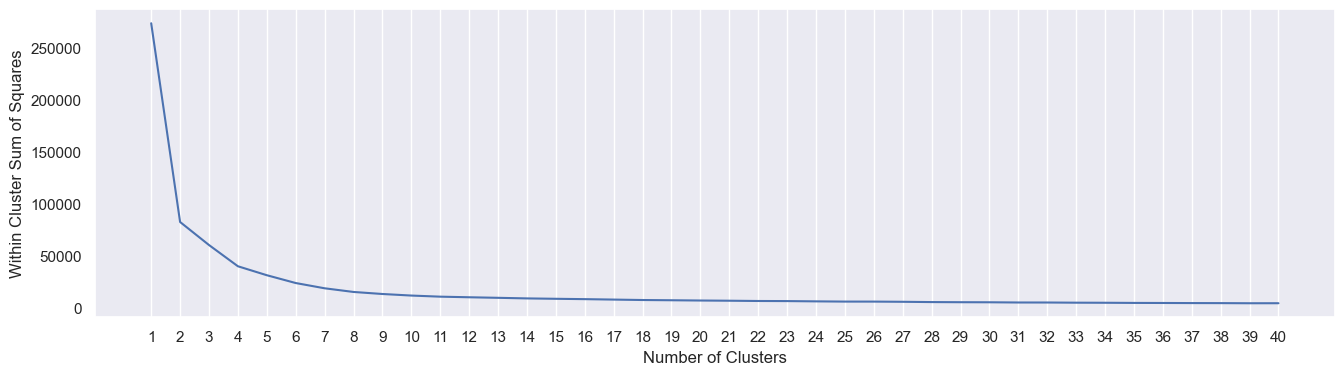

In [22]:
# Vary the Number of Clusters
min_clust = 1
max_clust = 40
init_algo = 'k-means++'

# Compute Within Cluster Sum of Squares
within_ss = []
for num_clust in range(min_clust, max_clust+1):
    kmeans = KMeans(n_clusters = num_clust, init = init_algo, n_init = 5)
    kmeans.fit(X)
    within_ss.append(kmeans.inertia_)

# Angle Plot : Within SS vs Number of Clusters
f = plt.figure(figsize=(16,4))
plt.plot(range(min_clust, max_clust+1), within_ss)
plt.xlabel('Number of Clusters')
plt.ylabel('Within Cluster Sum of Squares')
plt.xticks(np.arange(min_clust, max_clust+1, 1.0))
plt.grid(which='major', axis='y')
plt.show()

In [23]:
# Import essential models from sklearn
from sklearn.cluster import KMeans

# Set "optimal" Clustering Parameters
num_clust = 6
init_algo = 'k-means++'

# Create Clustering Model using KMeans
kmeans = KMeans(n_clusters = num_clust,         
               init = init_algo,
               n_init = 20)                 

# Fit the Clustering Model on the Data
kmeans.fit(X)

KMeans(n_clusters=6, n_init=20)

Features 	Curricular units 1st sem (enrolled) 	Curricular units 1st sem (grade) 	Curricular units 2nd sem (enrolled) 	Curricular units 2nd sem (grade) 	Scholarship holder

Cluster 0:	5.77	11.83	5.76	11.87	0.25	
Cluster 1:	5.58	0.0	5.7	0.65	0.06	
Cluster 2:	5.78	11.84	5.74	0.0	0.11	
Cluster 3:	13.55	12.55	11.92	12.57	0.13	
Cluster 4:	6.69	13.75	6.82	13.79	0.35	
Cluster 5:	0.03	0.0	0.02	-0.0	0.24	

Within Cluster Sum of Squares : 23997.38477480508



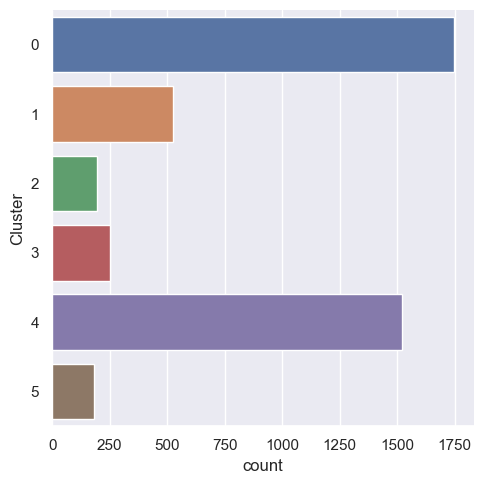

In [24]:
# Print the Cluster Centers
print("Features", "\tCurricular units 1st sem (enrolled)", "\tCurricular units 1st sem (grade)", "\tCurricular units 2nd sem (enrolled)", "\tCurricular units 2nd sem (grade)", "\tScholarship holder")
print()

for i, center in enumerate(kmeans.cluster_centers_):
    print("Cluster", i, end=":\t")
    for coord in center:
        print(round(coord, 2), end="\t")
    print()
print()

# Print the Within Cluster Sum of Squares
print("Within Cluster Sum of Squares :", kmeans.inertia_)
print()

# Predict the Cluster Labels
labels = kmeans.predict(X)

# Append Labels to the Data
X_labeled = X.copy()
X_labeled["Cluster"] = pd.Categorical(labels)

# Summary of the Cluster Labels
sb.catplot(y = "Cluster", data = X_labeled, kind = "count")

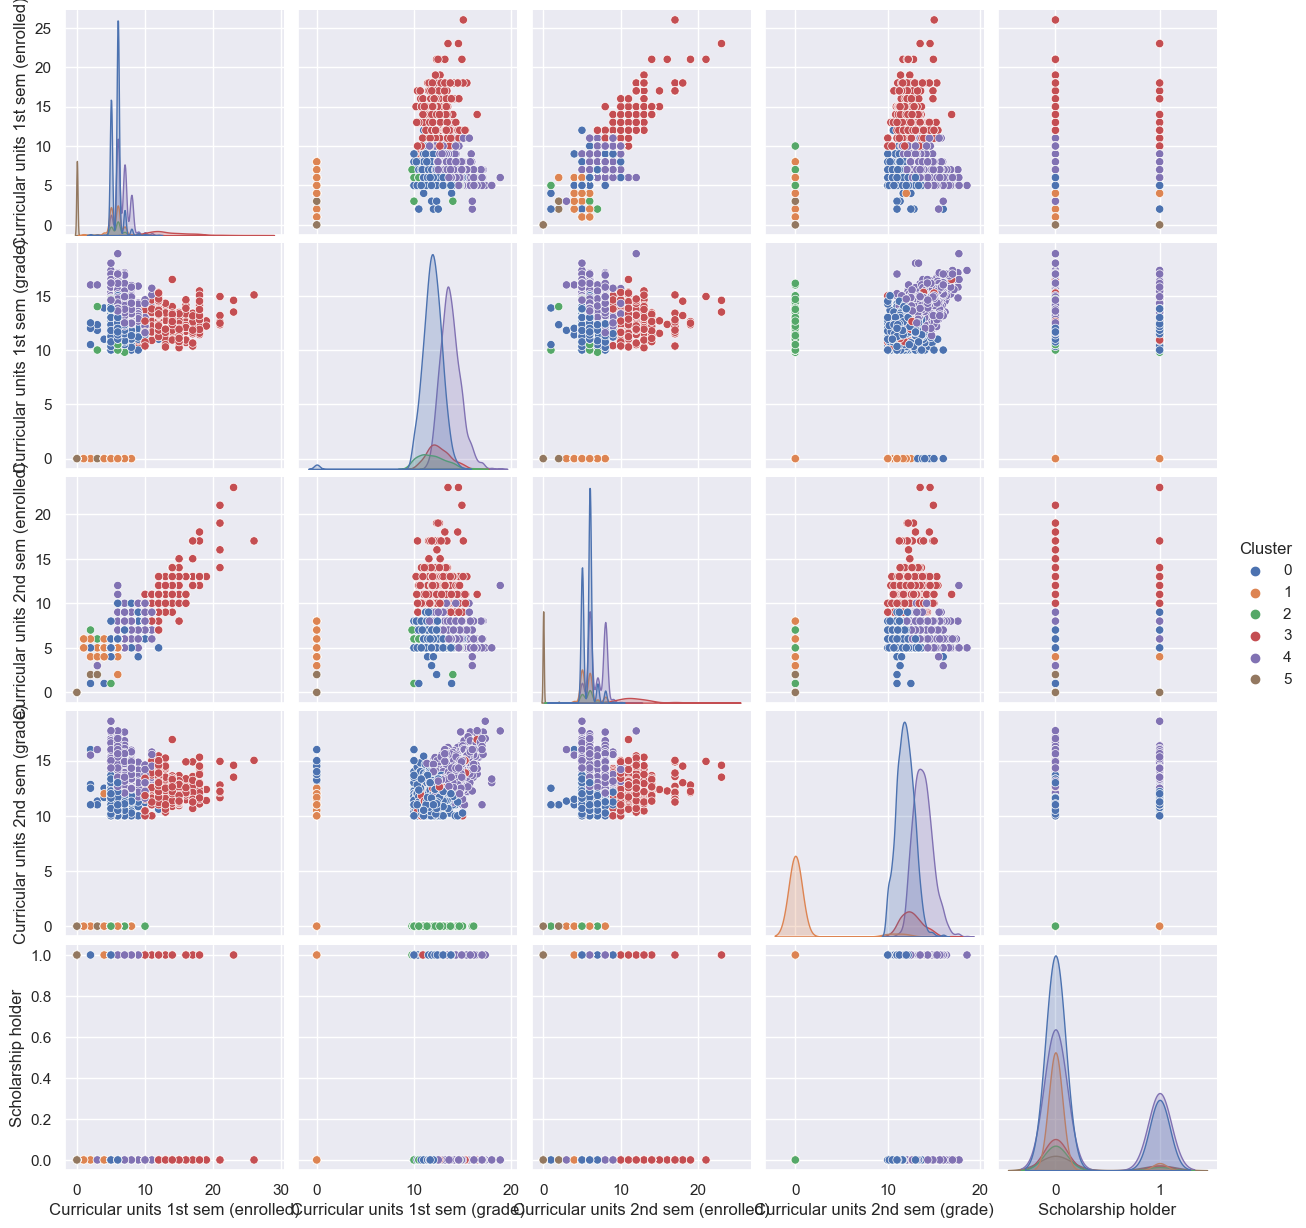

In [25]:
# Plot the Clusters on 2D grids
sb.pairplot(X_labeled, vars = X.columns.values, hue = "Cluster")

<AxesSubplot: xlabel='Scholarship holder', ylabel='Cluster'>

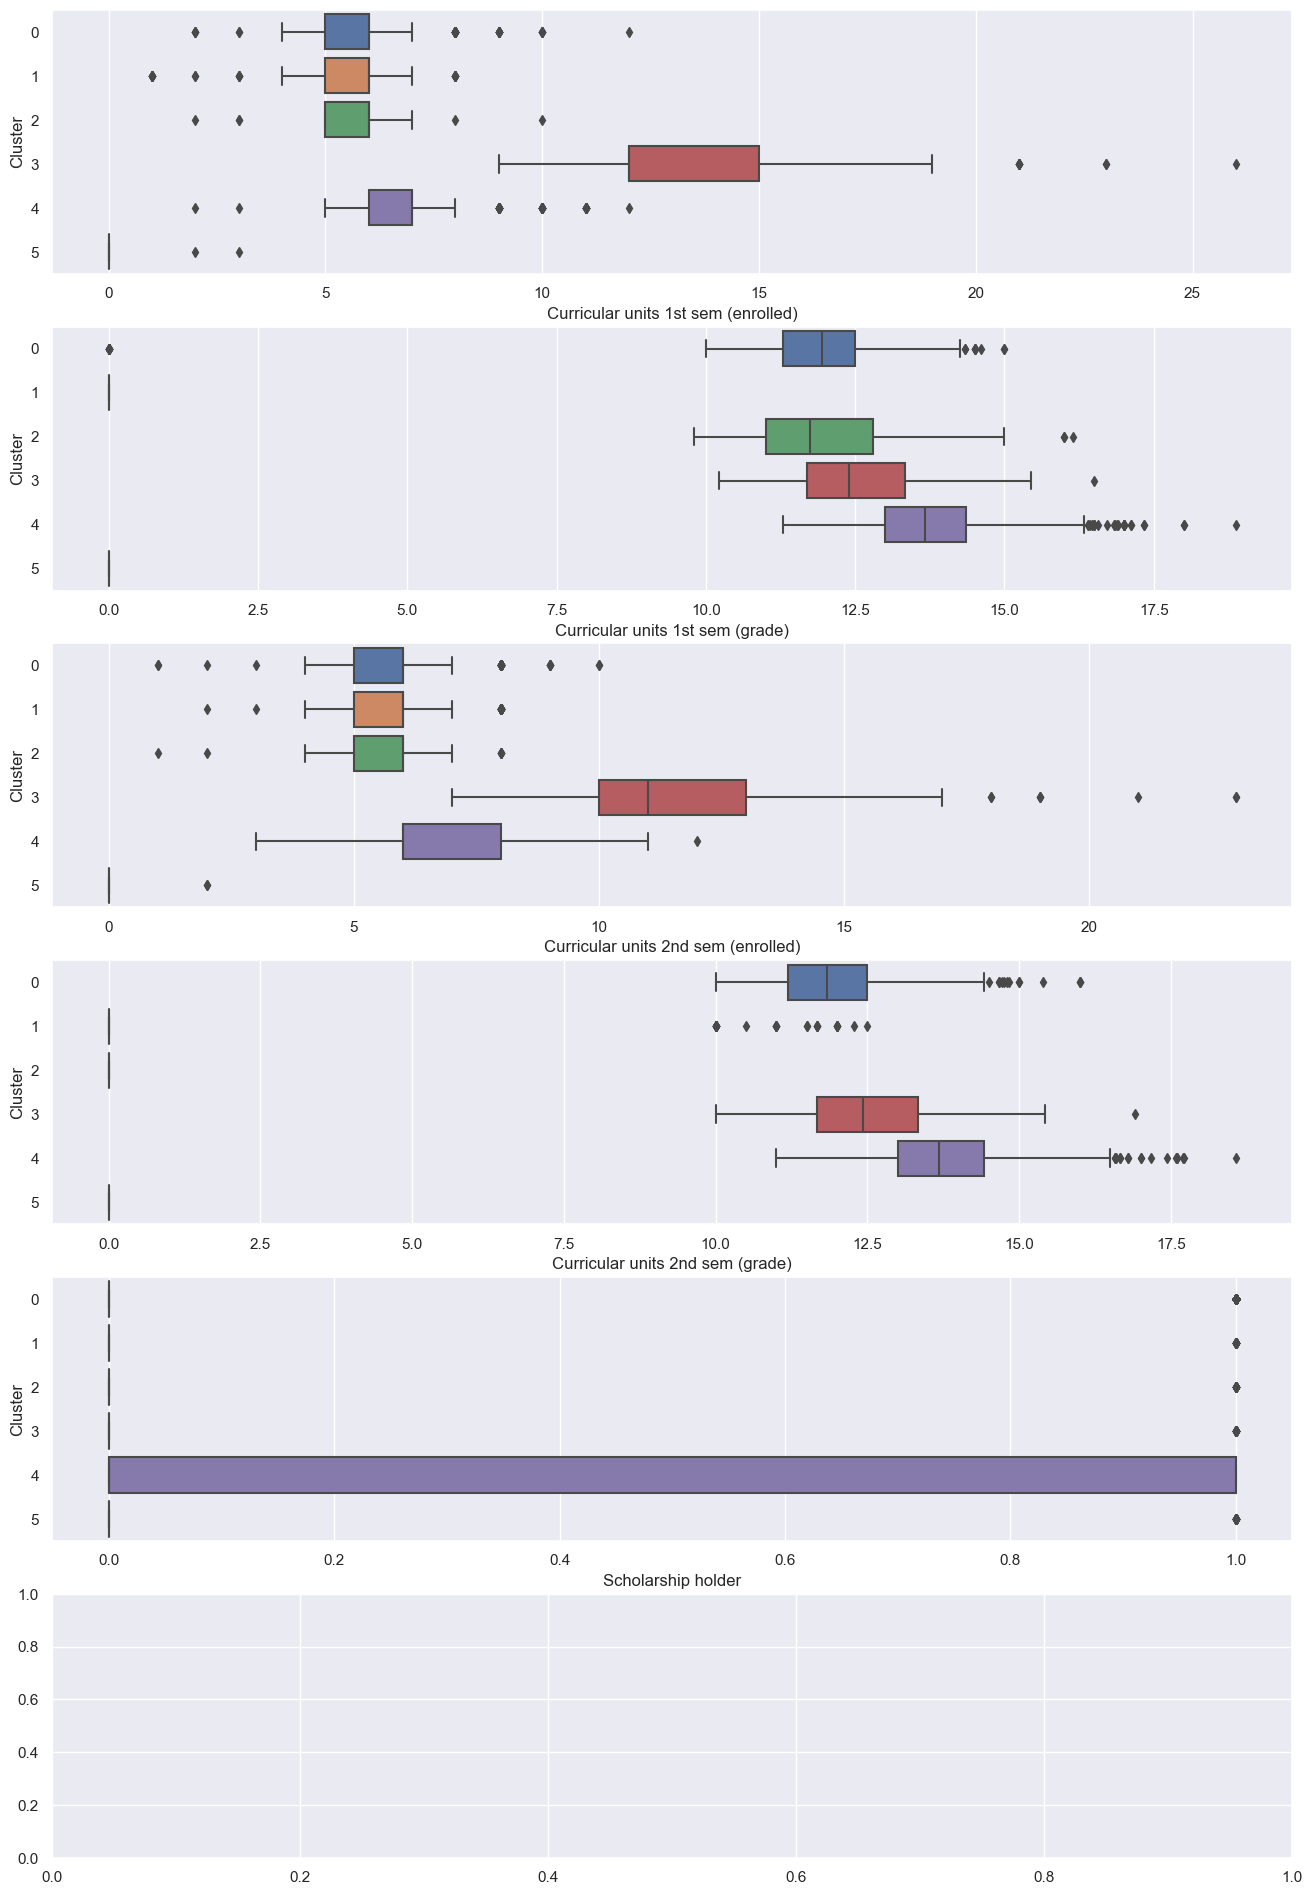

In [26]:
# Boxplots for all Features against the Clusters
f, axes = plt.subplots(6, 1, figsize=(16,24))
sb.boxplot(x = 'Curricular units 1st sem (enrolled)', y = 'Cluster', data = X_labeled, ax = axes[0])
sb.boxplot(x = 'Curricular units 1st sem (grade)', y = 'Cluster', data = X_labeled, ax = axes[1])
sb.boxplot(x = 'Curricular units 2nd sem (enrolled)', y = 'Cluster', data = X_labeled, ax = axes[2])
sb.boxplot(x = 'Curricular units 2nd sem (grade)', y = 'Cluster', data = X_labeled, ax = axes[3])
sb.boxplot(x = 'Scholarship holder', y = 'Cluster', data = X_labeled, ax = axes[4])

<AxesSubplot: xlabel='Cluster'>

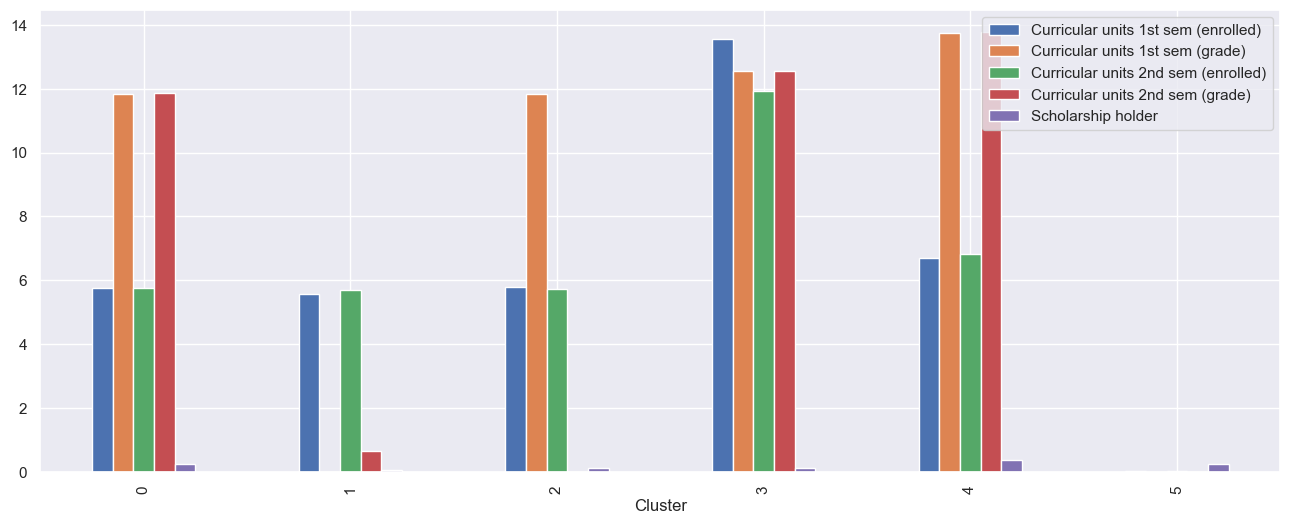

In [27]:
# Average Behaviour of each Cluster
cluster_data = pd.DataFrame(X_labeled.groupby(by = "Cluster").mean())
cluster_data.plot.bar(figsize = (16,6))